In [2]:
import timm
from fastai.vision.all import *

In [3]:
path = Path('/kaggle/input/stanford-dogs-dataset/images/Images')

In [4]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [5]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(size=size),
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path, bs=bs)

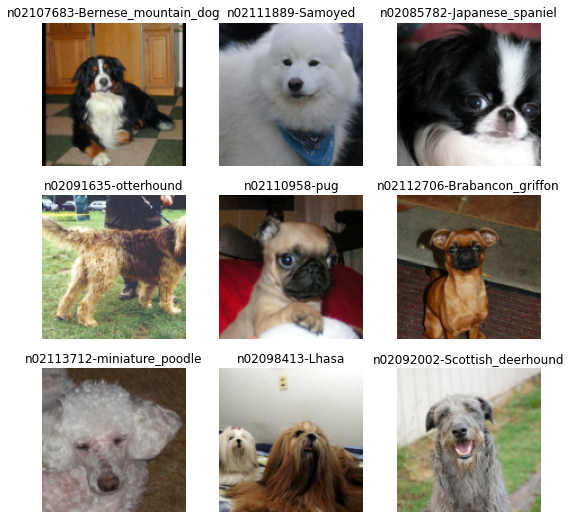

In [6]:
get_dls(128, 128).show_batch()

In [7]:
dls = get_dls(64, 128)
learn = vision_learner(dls, 'convnext_tiny_in22ft1k', loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fine_tune(3)
learn.dls = get_dls(32, 224)
learn.fine_tune(2)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_1k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_1k_224.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.457254,0.842455,0.741983,03:20


epoch,train_loss,valid_loss,accuracy,time
0,0.994489,0.684403,0.788873,03:46
1,0.776515,0.606475,0.819485,03:45
2,0.614154,0.583552,0.823129,03:42


epoch,train_loss,valid_loss,accuracy,time
0,0.656066,0.428959,0.870991,04:11


epoch,train_loss,valid_loss,accuracy,time
0,0.475368,0.369053,0.888727,09:41
1,0.310436,0.342812,0.902818,09:41


In [8]:
learn.export('model.pkl')